In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [3]:
# Load a pre-trained model (VGG16 in this example)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3));

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Freeze the pre-trained model layers
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# Add custom classification layers on top of the pre-trained model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

In [6]:
# Create the final model
model = Model(inputs=base_model.input, outputs=output)

In [12]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy']);

In [13]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6020 - loss: 1.1353 - val_accuracy: 0.5781 - val_loss: 1.2067
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6046 - loss: 1.1265 - val_accuracy: 0.5710 - val_loss: 1.2192
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6126 - loss: 1.1131 - val_accuracy: 0.5927 - val_loss: 1.1695
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6169 - loss: 1.1037 - val_accuracy: 0.5945 - val_loss: 1.1590
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6175 - loss: 1.0893 - val_accuracy: 0.5981 - val_loss: 1.1556
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6203 - loss: 1.0838 - val_accuracy: 0.5981 - val_loss: 1.1472
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6241 - loss: 1.0729 - val_accuracy: 0.5995 - val_loss: 1.1492
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6322 - loss: 

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6057 - loss: 1.1326
Test Loss: 1.1370360851287842
Test Accuracy: 0.60589998960495


In [15]:
import numpy as np

In [16]:
# Make Predictions on New Data
# Predict class for a single test image
img = X_test[1] # Take one image from the test set
img = np.expand_dims(img, axis=0) # Expand dimensions to fit the model inpu

In [17]:
# Get prediction
pred = model.predict(img)
predicted_class = np.argmax(pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [19]:
# Map predicted class index to the class label
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Predicted class: {class_labels[predicted_class[0]]}")

Predicted class: ship


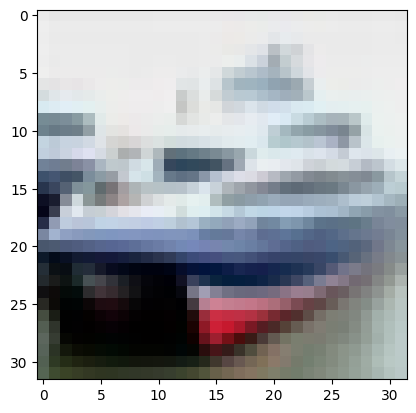

In [20]:
import matplotlib.pyplot as plt
img = X_test[1]
#img = img.squeeze(axis=0)
plt.imshow(img)
plt.show()